## Alpine Skiing

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


noc_region_df = pd.read_csv('../data/noc_regions.csv')
athlete_events_df = pd.read_csv('../data/athlete_events.csv')

merged_df = pd.merge(athlete_events_df, noc_region_df, how='inner', on='NOC')


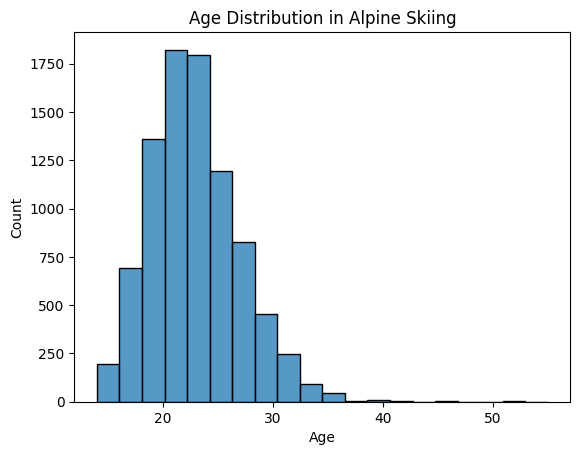

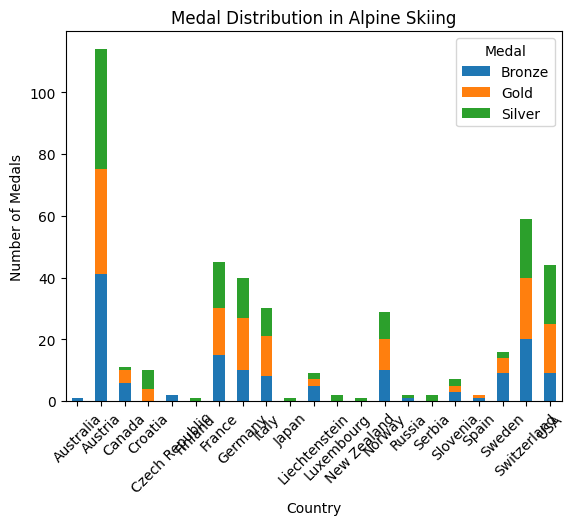

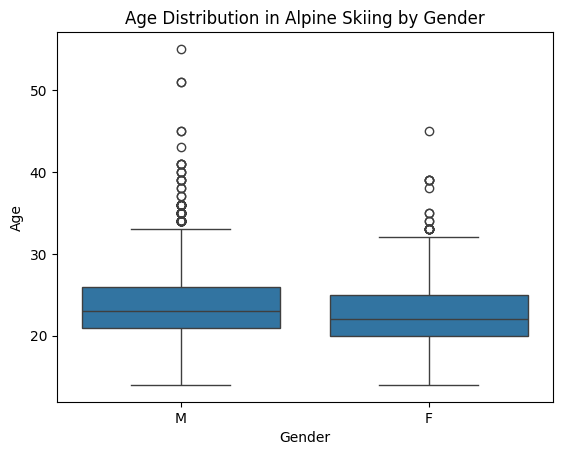

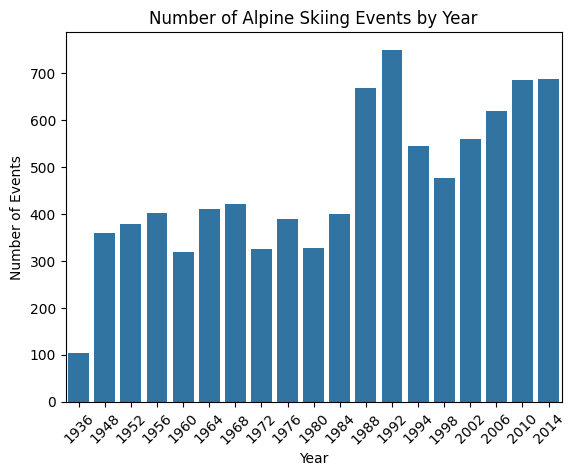

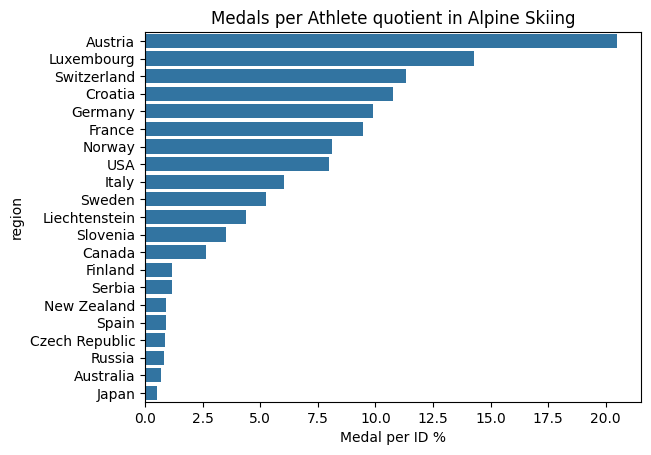

In [79]:
# Plot the age distribution histogram
def plot_age_distribution(sport_df, sport_name):
    sns.histplot(sport_df['Age'].dropna(), bins=20)
    plt.title(f'Age Distribution in {sport_name}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()


# Medal distribution between countries
def plot_medal_distribution(sport_df, sport_name):
    medal_distribution = sport_df.groupby(['region', 'Medal']).size().unstack(fill_value=0)
    medal_distribution.plot(kind='bar', stacked=True, title=f'Medal Distribution in {sport_name}')
    plt.xlabel('Country')
    plt.ylabel('Number of Medals')
    plt.xticks(rotation=45)
    plt.show()


# Plot age distribution by gender
def plot_age_by_gender(sport_df, sport_name):
    sns.boxplot(x='Sex', y='Age', data=sport_df)
    plt.title(f'Age Distribution in {sport_name} by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Age')
    plt.show()


# Plot number of events per year
def plot_events_by_year(sport_df, sport_name):
    sns.countplot(x='Year', data=sport_df)
    plt.title(f'Number of {sport_name} Events by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.show()

def plot_medals_per_athlete(sport_df, sport_name):
    MedalsPerCountry = sport_df.groupby(by="region")["Medal"].count()
    MedalsPerCountry_sorted = MedalsPerCountry.sort_values(ascending=False).reset_index()

    AthletePerCountry = sport_df.groupby(by="region")["ID"].count()
    AthletePerCountry_sorted = AthletePerCountry.sort_values(ascending=False).reset_index()

    MedalsPerContestant = pd.merge(MedalsPerCountry_sorted, AthletePerCountry_sorted, how="inner" )
    MedalsPerContestant["Medal per ID %"] = 100 * MedalsPerContestant["Medal"] / MedalsPerContestant["ID"]  # Calculating medals per athlete quotient
    MedalsPerContestant = MedalsPerContestant[MedalsPerContestant["Medal per ID %"] >= 0.1].sort_values(by="Medal per ID %", ascending=False)   # Excluding countries with lower quotient than 0.1%
    sns.barplot(MedalsPerContestant, x="Medal per ID %", y="region")
    plt.title(f'Medals per Athlete quotient in {sport_name}')



# Run full sport analysis
def analyze_sport(merged_df, sport='Gymnastics'):
    sport_df = merged_df[merged_df['Sport'] == sport].copy()

    plot_age_distribution(sport_df, sport)
    plot_medal_distribution(sport_df, sport)
    plot_age_by_gender(sport_df, sport)
    plot_events_by_year(sport_df, sport)
    plot_medals_per_athlete(sport_df, sport)


analyze_sport(merged_df, sport="Alpine Skiing")